In [ ]:
!pip install medium-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import os
from medium_api import Medium

# Create a `Medium` Object
medium = Medium('ENTER-YOUR-MEDIUM-API-KEY')

# Create a "TopWriters" Object
ds = medium.top_writers(
        topic_slug="data-science",
        count = 10
    )

# Fetch top writers and print their 'fullname' and 'username'
ds.fetch_users()

for writer in ds.users:
    print(writer.fullname, '---', writer.username)

The PyCoach --- frank-andrade
Giorgos Myrianthous --- gmyrianthous
Sanjay Priyadarshi --- priyadarshisanjay
Jim Clyde Monge --- jimclydemonge
Molly Ruby --- molly.ruby
Bex T. --- ibexorigin
B. Chen --- bindichen
Youssef Hosni --- youssefraafat57
Lars Nielsen --- pythoslabs
Matt Chapman --- mattchapmanmsc


In [ ]:
username = ds.users[0].username
print('Username: ', username)

user = medium.user(username=username) # User Object (currently empty)

user.save_info() # Saves user info

# Print all the attributes of the Medium User
print('Fullname: ', user.fullname)
print('Bio: ', user.bio)
print('Profile Image: ', user.image_url)
print('Top Writer In: ', user.top_writer_in)

print('User Written Articles: ', len(user.article_ids))

print('Followers: ', user.followers_count)
print('Following: ', user.following_count)



Username:  frank-andrade
Fullname:  The PyCoach
Bio:  8M+ Views on Medium || Early Bird Discount: Make money by writing about AI, programming, data science or tech 👉 http://bit.ly/3zfbgiX
Profile Image:  https://miro.medium.com/1*veEX4-CiLz5jqUjwWfQo_Q.jpeg
Top Writer In:  ['artificial-intelligence', 'technology', 'science', 'entrepreneurship', 'business']
User Written Articles:  250
Followers:  47978
Following:  7


In [ ]:
user.fetch_articles() # Saves user's articles info (without articles content)

import pandas as pd

articles_df = pd.json_normalize(user.articles_as_json)
articles_df.columns

Index(['id', 'tags', 'claps', 'last_modified_at', 'published_at', 'url',
       'image_url', 'is_series', 'lang', 'publication_id', 'word_count',
       'is_locked', 'title', 'reading_time', 'responses_count', 'voters',
       'topics', 'author', 'subtitle'],
      dtype='object')

In [ ]:
# Removing the unused columns
articles_df = articles_df.drop(['image_url',
                                'last_modified_at',
                                'url',
                                'author',
                                'is_locked',
                                'reading_time',
                                'is_series',
                                ], axis=1)


articles_df.columns

Index(['id', 'tags', 'claps', 'published_at', 'lang', 'publication_id',
       'word_count', 'title', 'responses_count', 'voters', 'topics',
       'subtitle'],
      dtype='object')

In [ ]:
#Before seperation by topics
print("Before seperation by topics")
print (articles_df['topics'])

#After seperation by topics
print("\n After seperation by topics")
articles_per_topic_df=articles_df.explode('topics')
print (articles_per_topic_df['topics'])


topic_frequency = articles_per_topic_df['topics'].value_counts()
topic_frequency=(topic_frequency.head(10))

print(topic_frequency)

Before seperation by topics
0                   [artificial-intelligence]
1                               [programming]
2                       [design, photography]
3      [artificial-intelligence, programming]
4                               [programming]
                        ...                  
245                        [data-science, tv]
246                [productivity, self, work]
247                            [data-science]
248                   [productivity, gadgets]
249          [machine-learning, data-science]
Name: topics, Length: 250, dtype: object

 After seperation by topics
0      artificial-intelligence
1                  programming
2                       design
2                  photography
3      artificial-intelligence
                ...           
247               data-science
248               productivity
248                    gadgets
249           machine-learning
249               data-science
Name: topics, Length: 429, dtype: object
programming   

In [ ]:
#Final data after preprocessing:
articles_per_topic_df.head(5)

,id,tags,claps,published_at,lang,publication_id,word_count,title,responses_count,voters,topics,subtitle
0,8ac0ffb14af9,"[artificial-intelligence, chatgpt, technology,...",115,2023-04-14 09:01:08,en,*Self-Published*,310,Share Your AI Knowledge With The World: Write ...,4,21,artificial-intelligence,Calling all AI and tech enthusiasts.
1,5a0ee4e1f39e,"[technology, artificial-intelligence, python, ...",171,2023-04-17 17:27:20,en,76436a11a2b0,839,How to Easily Install Auto-GPT: The Autonomous...,4,16,programming,Here’s how to locally install Auto-GPT in 3 st...
2,c876fbe7915e,"[artificial-intelligence, technology, chatgpt,...",793,2023-04-12 15:39:52,en,76436a11a2b0,1272,You’re Using Midjourney Wrong! Here’s How to C...,12,107,design,Generate amazing images by learning how to cre...
2,c876fbe7915e,"[artificial-intelligence, technology, chatgpt,...",793,2023-04-12 15:39:52,en,76436a11a2b0,1272,You’re Using Midjourney Wrong! Here’s How to C...,12,107,photography,Generate amazing images by learning how to cre...
3,bda045eed47f,"[technology, chatgpt, python, data-science, ar...",763,2023-04-11 10:30:02,en,76436a11a2b0,868,"The ChatGPT Skill That Pays Up to $335,000 a Year",13,145,artificial-intelligence,AI is creating amazing new jobs.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'programming'),
  Text(1, 0, 'data-science'),
  Text(2, 0, 'machine-learning'),
  Text(3, 0, 'artificial-intelligence'),
  Text(4, 0, 'marketing'),
  Text(5, 0, 'education'),
  Text(6, 0, 'writing'),
  Text(7, 0, 'productivity'),
  Text(8, 0, 'books'),
  Text(9, 0, 'language')])

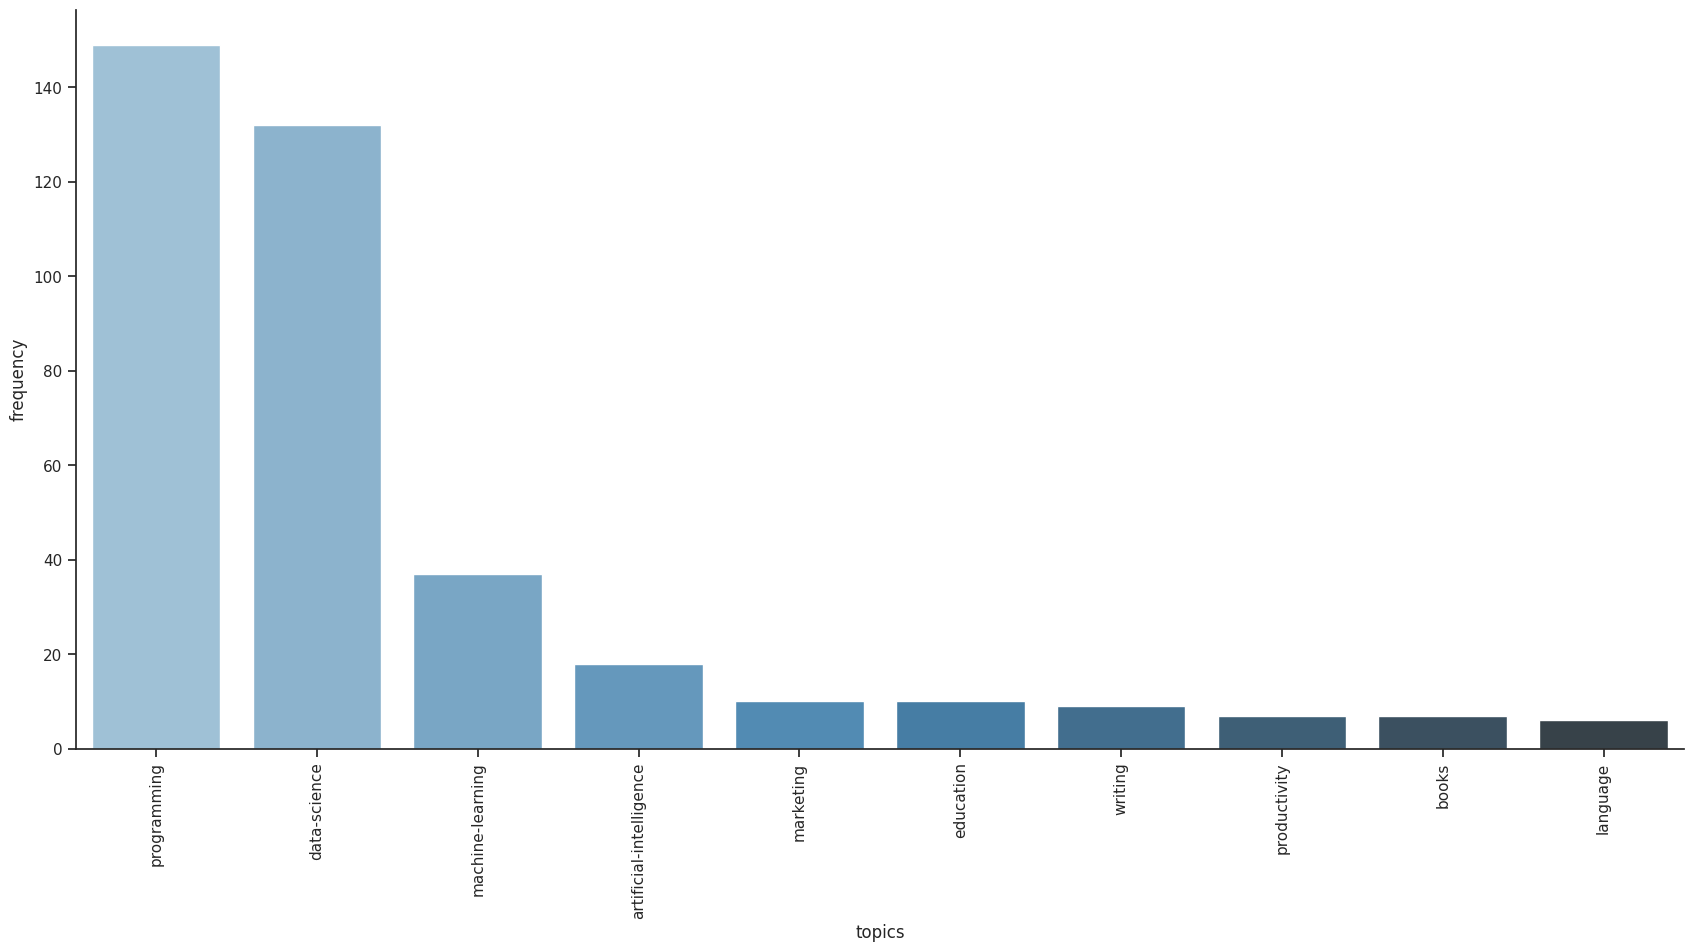

In [ ]:
!pip install matplotlib seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

topics = list(topic_frequency.index)
freqs = list(topic_frequency.values)

df = pd.DataFrame(
    {
        "topics": topics,
        "frequency": freqs
    }
)
df['topics'] = df['topics'].astype(str)

sns.catplot(x="topics", y="frequency", kind="bar", palette = 'Blues_d',
            data=df, height=8.27, aspect=17.1/8.27)

plt.xticks(rotation=90)

In [ ]:
def id_to_slug(id):
  if id=='*Self-Published*':
    return('*Self-Published*')
  else:
    publication = medium.publication(publication_id=id)

    slug = publication.slug
    return(slug)

new_col = articles_df['publication_id'].apply(id_to_slug)
articles_df.insert(loc=2, column='publication_slug', value=new_col)

publication_frequency = articles_df['publication_slug'].value_counts()
print(publication_frequency)

towards-data-science        82
geekculture                 76
artificial-corner           25
learn-languages-with-tv     22
*Self-Published*            12
datadriveninvestor          12
swlh                         8
better-programming           5
illumination                 4
entrepreneur-s-handbook      1
books-are-our-superpower     1
better-humans                1
curious                      1
Name: publication_slug, dtype: int64


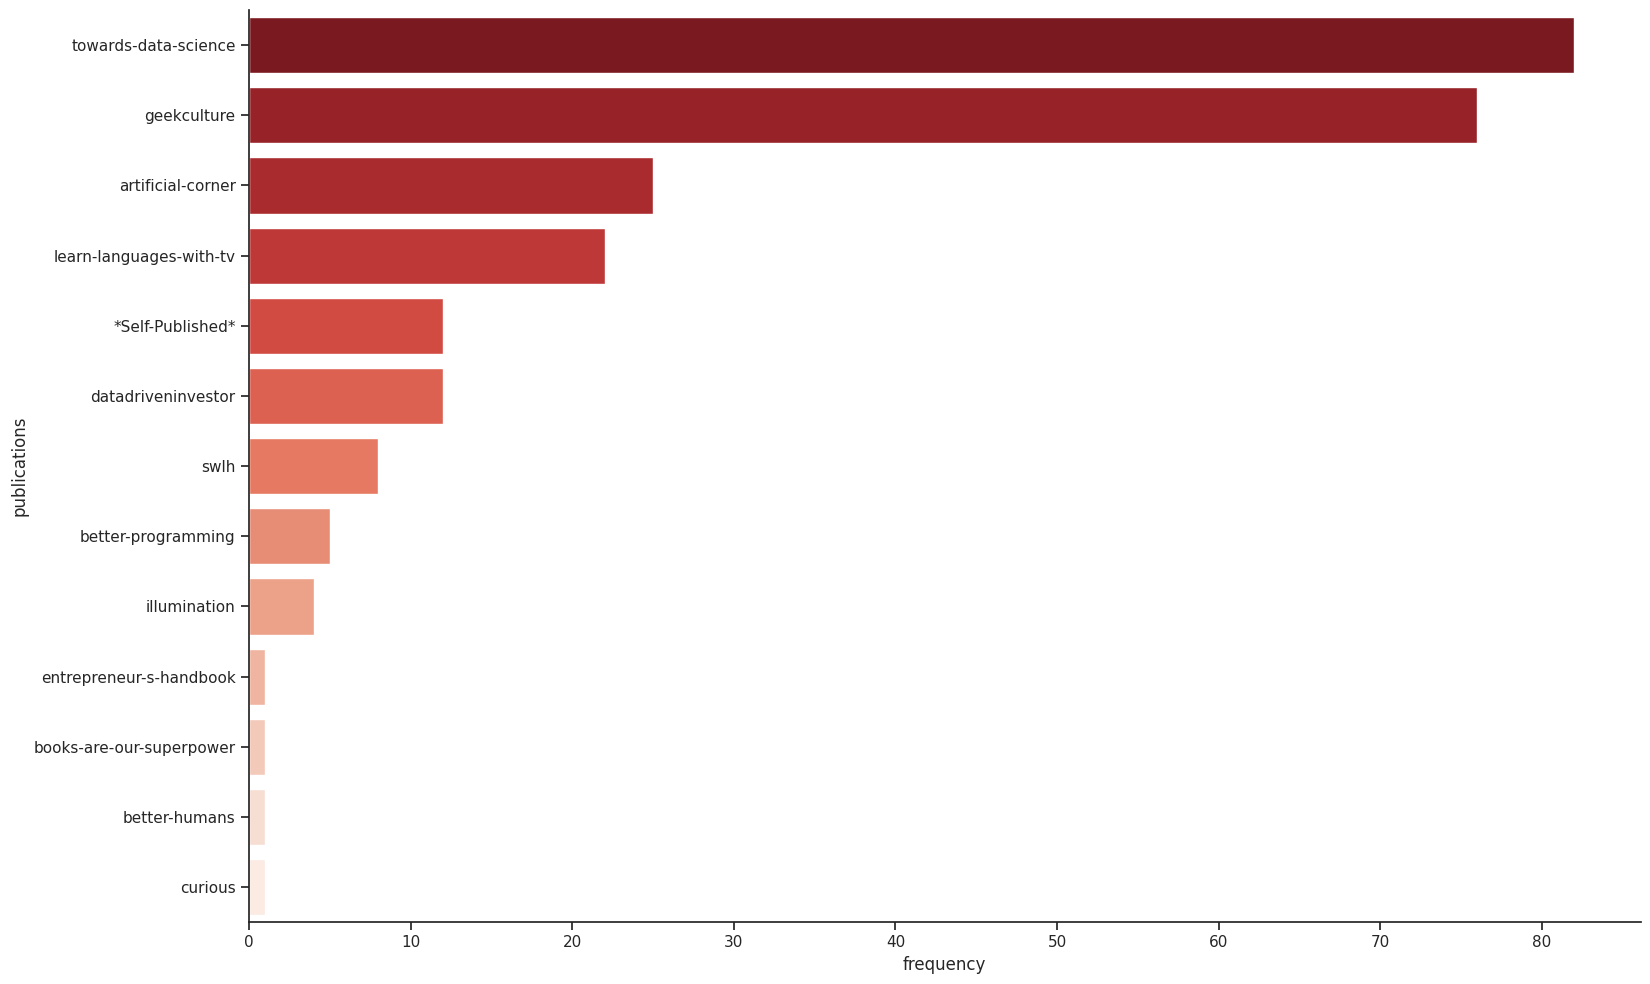

In [ ]:
sns.set_theme(style="ticks", color_codes=True)

pubs = list(publication_frequency.index)
freqs = list(publication_frequency.values)

df = pd.DataFrame(
    {
        "publications": pubs,
        "frequency": freqs
    }
)

sns.catplot(y="publications", x="frequency", kind="bar", palette = 'Reds_r',
            data=df, height=10, aspect=25/15)



In [ ]:
table = articles_df.groupby(['publication_slug']).mean().sort_values('voters',ascending=False)
table.insert(loc=0, column='Number_of_articles', value = articles_df.groupby('publication_slug').size())
print(f'Till now, {username} has published under {len(table.index)-1} publications.')

table=table[table['Number_of_articles'] >= 10]

table

Till now, frank-andrade has published under 12 publications.


<ipython-input-60-953ce5cb708f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = articles_df.groupby(['publication_slug']).mean().sort_values('voters',ascending=False)


,Number_of_articles,claps,word_count,responses_count,voters
publication_slug,,,,,
artificial-corner,25,1368.200000,975.280000,26.440000,303.840000
geekculture,76,609.552632,1106.407895,11.250000,170.000000
towards-data-science,82,465.987805,1357.634146,6.963415,152.402439
datadriveninvestor,12,240.166667,1610.166667,3.416667,50.250000
*Self-Published*,12,225.500000,939.500000,5.166667,44.833333
learn-languages-with-tv,22,202.318182,1161.545455,1.363636,24.409091


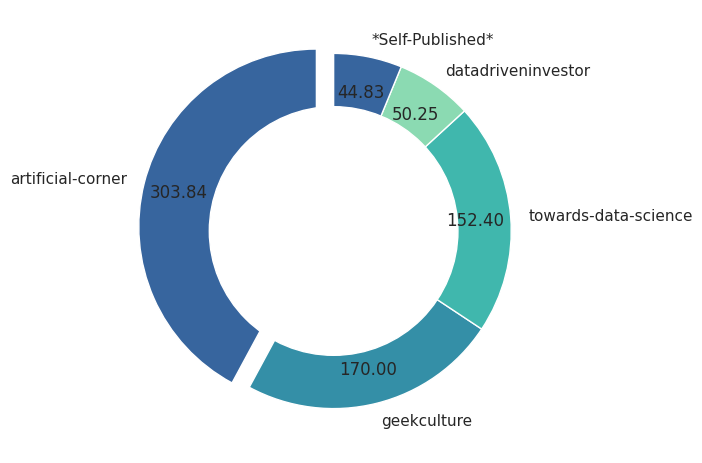

In [ ]:
sns.set_theme(style="ticks", color_codes=True)
publications = list(table.index[:5])
data = list(table.voters[:5])

df = pd.DataFrame(
    {
        "publications": publications,
        "Average_voter_count": data
    }
)

colors = sns.color_palette("mako")[2:]

#create pie chart
explode = (0.1, 0, 0, 0,0)
plt.pie(data, labels = publications, colors = colors,explode=explode,startangle=90, pctdistance=0.8, autopct=lambda p : '{:.2f}'.format(p * sum(data)/100))
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig('publication-pie.png', dpi=300)
plt.show()


In [ ]:
table = articles_per_topic_df.groupby(['topics']).mean().sort_values('voters',ascending=False)
table.insert(loc=0, column='Number_of_articles', value = articles_per_topic_df.groupby('topics').size())
table

<ipython-input-62-a470e428e31c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = articles_per_topic_df.groupby(['topics']).mean().sort_values('voters',ascending=False)


,Number_of_articles,claps,word_count,responses_count,voters
topics,,,,,
artificial-intelligence,18,1470.777778,925.277778,30.000000,327.611111
productivity,7,978.285714,1296.000000,17.000000,243.571429
sports,5,778.200000,1162.000000,36.800000,234.200000
machine-learning,37,822.000000,1416.621622,12.162162,229.432432
programming,149,611.087248,1230.691275,9.852349,175.966443
data-science,132,531.454545,1283.106061,8.280303,158.545455
software-engineering,1,644.000000,738.000000,6.000000,151.000000
relationships,1,447.000000,803.000000,5.000000,106.000000
photography,2,571.000000,1175.500000,11.500000,99.500000


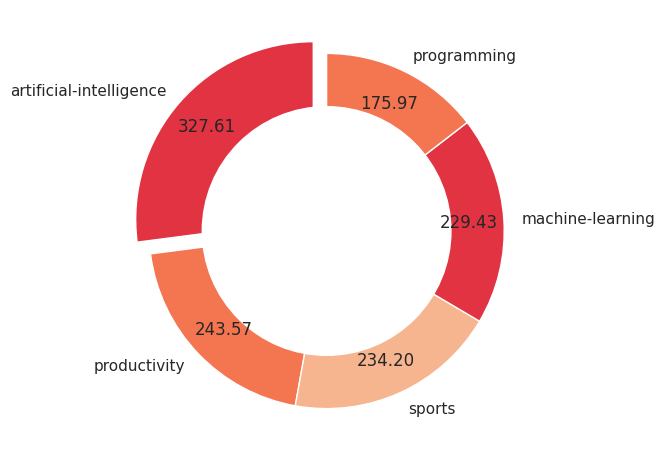

In [ ]:
sns.set_theme(style="ticks", color_codes=True)
topics = list(table.index[:5])
data = list(table.voters[:5])

df = pd.DataFrame(
    {
        "topics": topics,
        "Average_voter_count": data
    }
)

colors = sns.color_palette("rocket")[3:]

#create pie chart
explode = (0.1, 0, 0, 0,0)
plt.pie(data, labels = topics,explode=explode,startangle=90, pctdistance=0.8, colors = colors, autopct=lambda p : '{:.2f}'.format(p * sum(data)/100))
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('topic-pie.png', dpi=300)
plt.show()

In [ ]:
import nltk
import json
from nltk.sentiment import SentimentIntensityAnalyzer
import os
!pip install transformers
import transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
content_list=[]
for id in articles_df["id"]:
  content_list.append(medium.article(article_id=id).content)
articles_df["content"]=content_list

In [ ]:
# Perform sentiment analysis on the articles
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_score=[]


for content in articles_df["content"]:
  sentiment_score.append(sia.polarity_scores(content)["compound"])
articles_df["sentiment_score"]=sentiment_score
articles_df[["title","sentiment_score"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,title,sentiment_score
0,Share Your AI Knowledge With The World: Write ...,0.9846
1,How to Easily Install Auto-GPT: The Autonomous...,0.9917
2,You’re Using Midjourney Wrong! Here’s How to C...,0.9990
3,"The ChatGPT Skill That Pays Up to $335,000 a Year",0.9985
4,The Chatbot Competition: A Hands-On Comparison...,0.9990
...,...,...
245,Learn a Foreign Language with Friends,0.9997
246,"Learn the language hacking method, jump on Hel...",0.9999
247,The Simpsons is the Best TV show to Increase Y...,0.9993
248,6 Months Without an iPhone — This Is How My Li...,0.9976


In [ ]:
#Summarization
!pip install git+https://github.com/neuml/txtai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/neuml/txtai to /tmp/pip-req-build-qx__n4ta
  Running command git clone --filter=blob:none --quiet https://github.com/neuml/txtai /tmp/pip-req-build-qx__n4ta
  Resolved https://github.com/neuml/txtai to commit f393b95eea79f1dcc4f3de754f948001c9769141
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 8.6 MB/s eta 0:00:00
  Created wheel for txtai: filename=txtai-5.5.0-py3-none-any.whl size=167320 sha256=e87623f229e3ae4682979acaa74dc446d5a775667e8a2a9291c6b95f6421e30f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7g5we9xv/wheels/1c/21/76/fe34260886f366a2a7f440e42722b0a60b84cf8e466201b22a
Successfully built txtai


In [ ]:
from txtai.pipeline import Summary

# Create summary model
summary = Summary()

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
content_summary=[]
for text in articles_df["content"][:10]:
  summ=summary(text, maxlength=50)

  content_summary.append(summ)

#articles_df["summary"]=content_summary
#articles_df["summary"]

content_summary

0      Share Your AI Knowledge With The World: Write ...
1      How to Easily install Auto-GPT: The Autonomous...
2      A simple and short Midjourney prompt typically...
3      The ChatGPT Skill That Pays Up to $335,000 a Y...
4      The Chatbot Competition: A Hands-On Comparison...
                             ...                        
245    The One Where Estelle Dies (Season 10-Episode ...
246    Learn the language hacking method, jump on Hel...
247    Learn English with The Simpsons and increase y...
248    6 months without an iPhone - This Is How My Li...
249    The Best Movies to Learn a Foreign Language Ac...
Name: summary, Length: 250, dtype: object